In [ ]:
!pip install category_encoders
import pandas as pd
import numpy as np
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# Importing the dataset
ld = pd.read_csv(r"/content/drive/MyDrive/Loan_default.csv")
ld.head(20)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


**SECTION 1:
EXPLORATORY DATA ANALYSIS**

In [ ]:
# checking the datatypes present in the dataset
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

**Observations: The dataset consist of both numeric and categorical features.**

In [ ]:
# Checking for empty row or nulls
ld.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

**Observation**: The dataset does not have any missing values in it

In [ ]:
# checking for outliers
ld.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [ ]:
# Checking for the data distribution of both the numeric and the categorical data
ld.describe(include = 'all')

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347,255347,255347,255347,255347,255347,255347,255347.000000
unique,255347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,5,2,NaN
top,I38PQUQS96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64366,64161,85302,127677,127742,51298,127701,NaN
mean,NaN,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116128
std,NaN,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320379
min,NaN,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


***EXPLORATORY DATA ANALYSIS THE NUMERICAL COLUMNS***

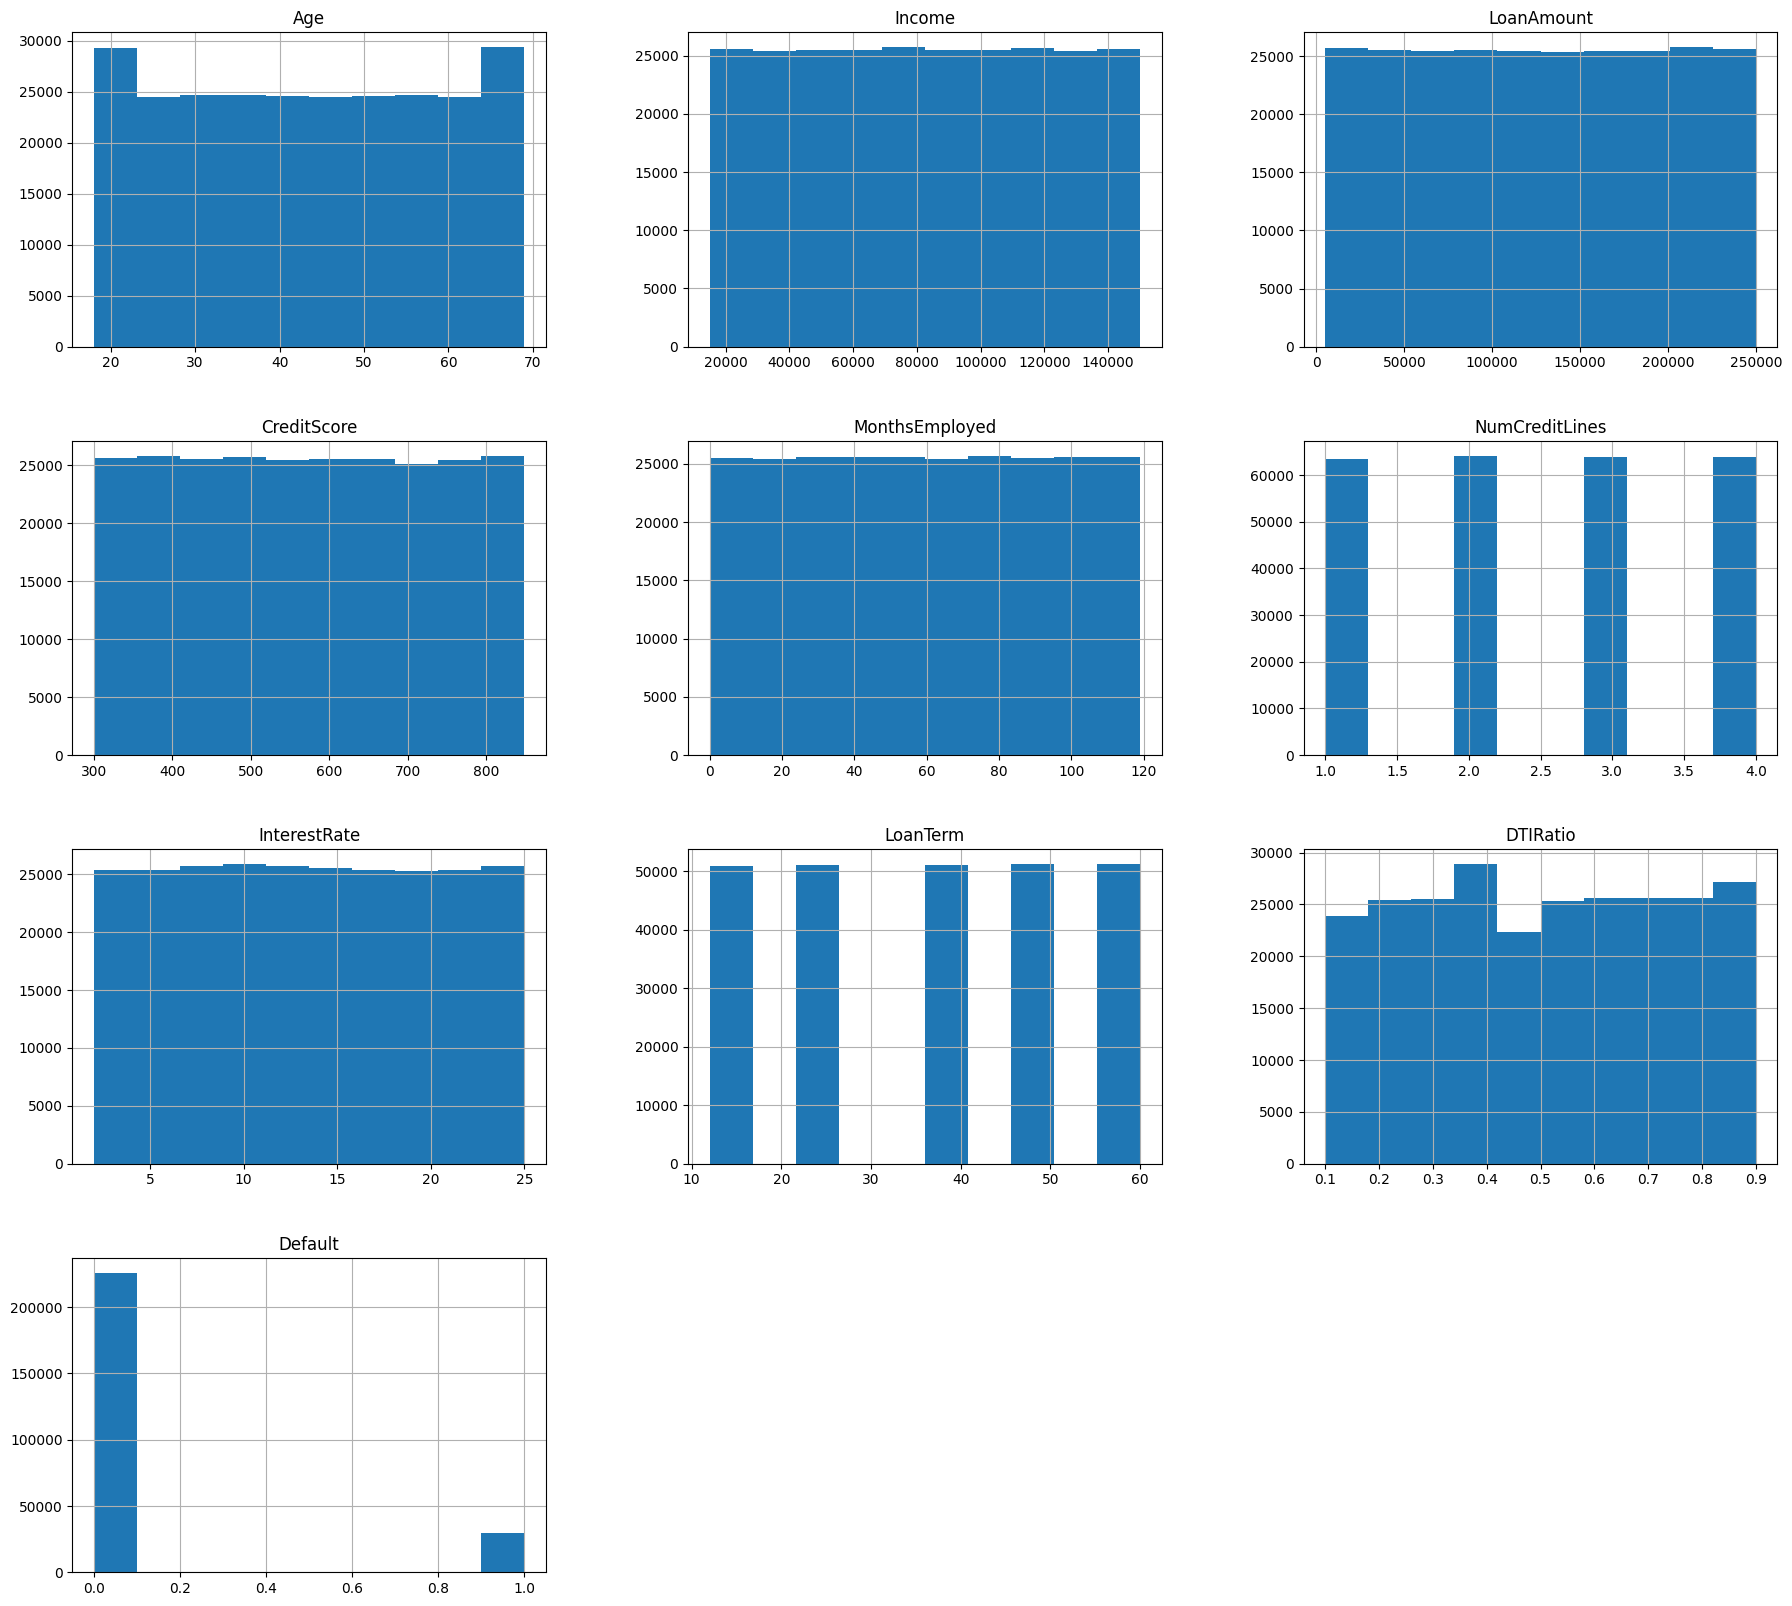

In [ ]:
import matplotlib.pyplot as plt
# Checking the data distribution of the numerical data
ld.hist( figsize = (22, 20) )
plt.show()

In [ ]:
# check for duplicate
ld.duplicated().sum()

0

**Observation**:

In [ ]:
# THe numerical features are:
colm = ['Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Default']

**NOTE**: The assigned variable 'colm' also consist of the **target** column 'Default'

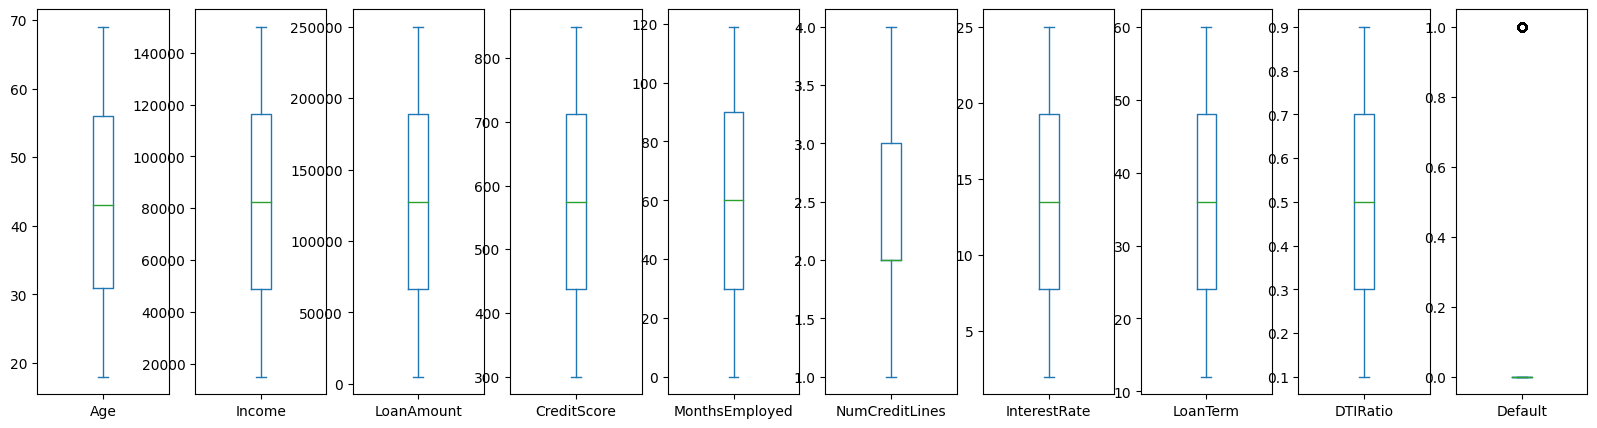

In [ ]:
ld[colm].plot(
    kind = 'box',
    figsize = (20, 5),
    subplots = True
);

**Observation**: The numerical columns does not have any **outliers** in it

In [ ]:
# Removing unneeded column
ld = ld.drop('LoanID', axis = 1)
ld.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
# Since we are trying to predict  a loan default status, now we create a counplot to visualize our label
ld["Default"].value_counts()
ld["Default"].value_counts()


Default
0    225694
1     29653
Name: count, dtype: int64

In [ ]:
ld["LoanPurpose"].value_counts()

LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

<Axes: xlabel='Default', ylabel='count'>

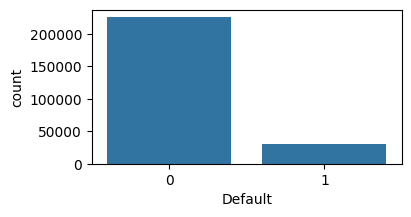

In [ ]:
import seaborn as sns
plt.figure(figsize=(4,2))
sns.countplot(data = ld,x = 'Default')

 **Observations**: Only a small part of the target variable consists of people who default on loans, that is, the data is considered **imbalance**

In [ ]:
cat_features = ['Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

Num_features = ['Age','Income','LoanAmount', 'CreditScore', 'MonthsEmployed',
                      'NumCreditLines', 'InterestRate', 'LoanTerm','DTIRatio']

In [ ]:
ld[cat_features].value_counts()

Education    EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  HasCoSigner
Bachelor's   Unemployed      Married        Yes          No             Other        Yes            172
             Part-time       Single         Yes          No             Education    No             171
             Full-time       Single         No           No             Other        No             170
PhD          Part-time       Married        Yes          Yes            Auto         No             170
High School  Unemployed      Single         No           Yes            Home         No             169
                                                                                                   ... 
PhD          Full-time       Divorced       No           Yes            Education    No              98
Master's     Self-employed   Single         Yes          No             Auto         Yes             98
PhD          Self-employed   Married        No           Yes           

In [ ]:
# lets explore the correlation between the continous feature variables
# Checking the correlation between the numerical features
correlation = ld[Num_features].corr()
correlation

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000


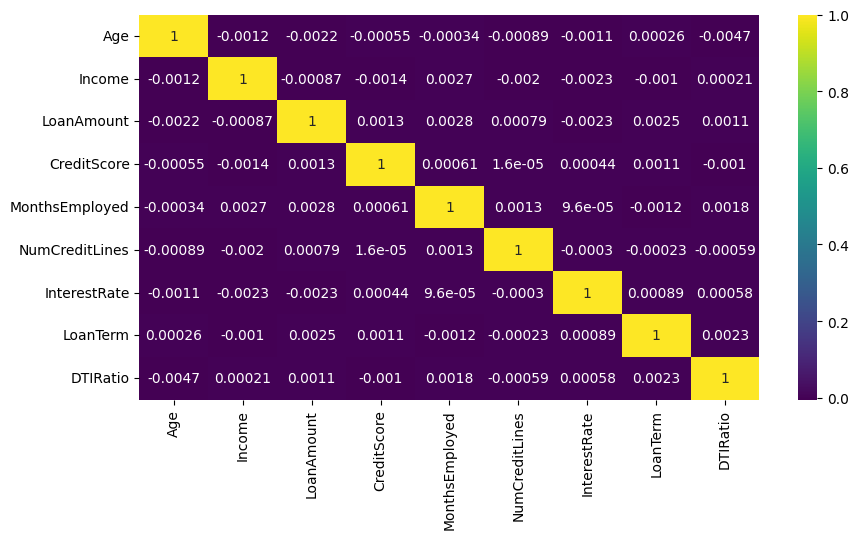

In [ ]:
# visualizing the correlation using a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot = True,cmap= 'viridis')
plt.show()

**Observation:** The**correlation analysis** reveals a strong **relationship** between **age** and **interest rate**, which makes sense. **Age** can influence a person's ability to repay a loan, and higher **interest rates** can increase the likelihood of **default**.

<Axes: xlabel='Default', ylabel='LoanAmount'>

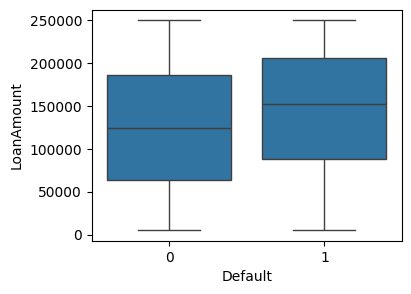

In [ ]:
# Let us explore the relationship between DEFAULT AND LOANAMOUNT. let see if loan amount determines if a person will default or not
plt.figure(figsize=(4,3))
sns.boxplot(data = ld,x='Default',y='LoanAmount')

**Observation:** It's clear from our analysis that there's a strong **correlation** between the **LoanAmount** and the likelihood of **default**. As the **LoanAmount** increases, so does the **probability** of default.

<Axes: xlabel='Default', ylabel='CreditScore'>

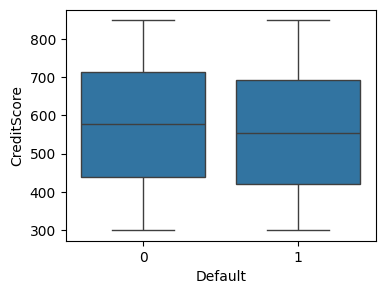

In [ ]:
# Let us explore the relationship between DEFAULT AND CREDITSCORE. let see how correlating credit score is, to default
plt.figure(figsize=(4,3))
sns.boxplot(data = ld,x='Default',y='CreditScore')

In [ ]:
# the summary statistics for the credit score, grouped by the default
ld.groupby('Default')['CreditScore'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,576.232270,158.849404,300.0,439.0,577.0,714.0,849.0
1,29653.0,559.286143,158.521855,300.0,421.0,553.0,693.0,849.0


**Observation:** **Credit score** significantly influences **default** likelihood, with higher scores indicating lower risk and vice versa, crucial for lenders in assessing borrower reliability.

<Axes: xlabel='Default', ylabel='Income'>

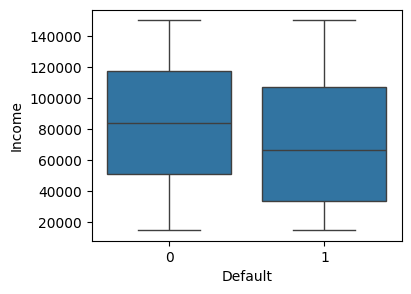

In [ ]:
# Let us explore the relationship between DEFAULT AND INCOME.
plt.figure(figsize=(4,3))
sns.boxplot(data = ld,x='Default',y='Income')

In [ ]:
#the summary statistics for the income, grouped by the default

ld.groupby('Default')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,83899.165995,38498.801232,15000.0,50994.0,84237.5,117186.75,149999.0
1,29653.0,71844.722659,40785.099507,15004.0,34022.0,66566.0,106895.00,149995.0


**Observation:**  The **correlation** is evident: **higher income** levels **correspond** to **decreased default probability**, highlighting the importance of **income** assessment in risk evaluation for lenders.

<Axes: xlabel='Default', ylabel='InterestRate'>

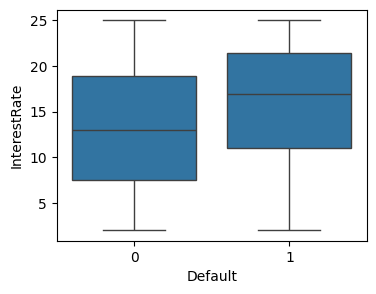

In [ ]:
# Let us explore the relationship between DEFAULT AND INTEREST RATE.
plt.figure(figsize=(4,3))
sns.boxplot(data = ld,x='Default',y='InterestRate')

In [ ]:
# lets calculate the summary statistics for the interest rate, grouped by the default


ld.groupby('Default')['InterestRate'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,13.176994,6.612265,2.0,7.45,12.99,18.85,25.0
1,29653.0,15.896227,6.320304,2.0,11.06,16.93,21.36,25.0


**Observation:**  The **relationship** is **stark**: **higher interest** rates correspond to **increased default likelihood**, emphasizing the impact of **interest rates** on borrower repayment capacity and risk assessment for lenders.

<Axes: xlabel='Default', ylabel='LoanTerm'>

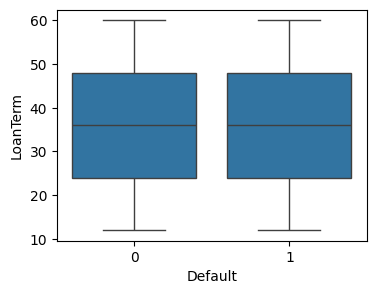

In [ ]:
# Let us explore the relationship between DEFAULT AND loan term.
plt.figure(figsize=(4,3))
sns.boxplot(data = ld,x='Default',y='LoanTerm')

In [ ]:
#the summary statistics for the Loan term, grouped by the default
ld.groupby('Default')['LoanTerm'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,36.022544,16.966374,12.0,24.0,36.0,48.0,60.0
1,29653.0,36.051394,16.992077,12.0,24.0,36.0,48.0,60.0


**Observation:**

<Axes: xlabel='Default', ylabel='DTIRatio'>

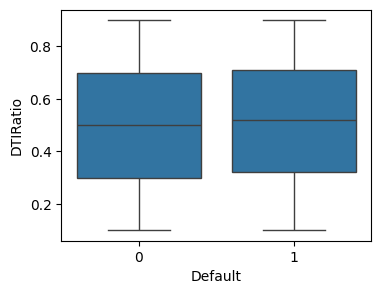

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data = ld,x='Default',y='DTIRatio')

In [ ]:
# lets calculate the summary statistics for the Loan term, grouped by the default


ld.groupby('Default')['DTIRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,0.498602,0.231099,0.1,0.30,0.50,0.70,0.9
1,29653.0,0.512467,0.229160,0.1,0.32,0.52,0.71,0.9


**Observation:**

### ***EXPLORATORY DATA ANALYSIS THE CATEGORICAL COLUMNS***

**RATIO OF DEFAULT IN EMPLOYMENT TYPE**

<Axes: xlabel='EmploymentType', ylabel='count'>

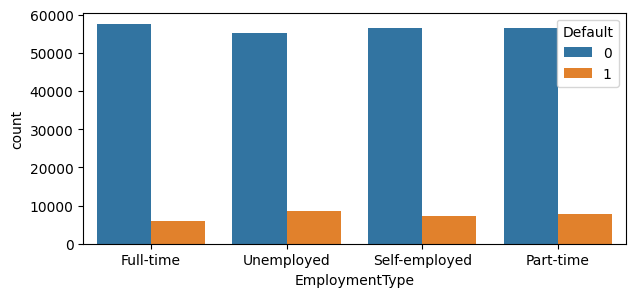

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(data = ld,x = 'EmploymentType', hue = 'Default')

**Observation:**

In [ ]:
yes_default = ld[ld['Default']==1].groupby('EmploymentType').count()['Default']
no_default = ld[ld['Default']==0].groupby('EmploymentType').count()['Default']
percentage_default= yes_default / (yes_default+no_default)
percentage_default

EmploymentType
Full-time        0.094634
Part-time        0.119652
Self-employed    0.114620
Unemployed       0.135529
Name: Default, dtype: float64

<Axes: xlabel='EmploymentType'>

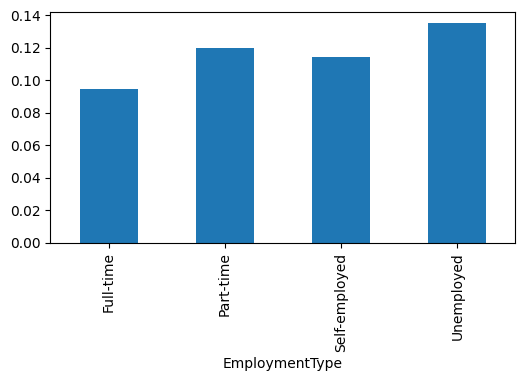

In [ ]:
plt.figure(figsize=(6,3))
percentage_default .plot(kind = 'bar')

**Observation:** It's evident that unemployed individuals might struggle to repay their loans. This makes sense, as lacking a job typically means lacking a steady income to cover loan payments.

**RATIO OF DEFAULT IN HASMORTGAGE**

<Axes: xlabel='HasMortgage', ylabel='count'>

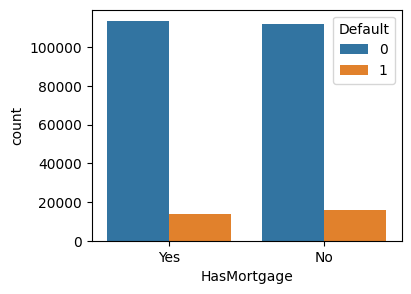

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data = ld,x = 'HasMortgage', hue = 'Default')

In [ ]:
HasMortgage_yes_default = ld[ld['Default']==1].groupby('HasMortgage').count()['Default']
HasMortgage_no_default = ld[ld['Default']==0].groupby('HasMortgage').count()['Default']
percentage_mortage_default= HasMortgage_yes_default/ (HasMortgage_yes_default+HasMortgage_no_default)
percentage_mortage_default

HasMortgage
No     0.123451
Yes    0.108806
Name: Default, dtype: float64

<Axes: xlabel='HasMortgage'>

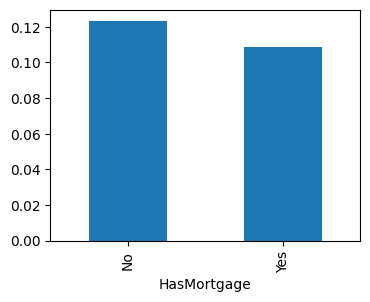

In [ ]:
plt.figure(figsize=(4,3))
percentage_mortage_default.plot(kind = 'bar')

**Observation:*

**RATIO OF DEFAULT IN MARITAL STATUS**

<Axes: xlabel='MaritalStatus', ylabel='count'>

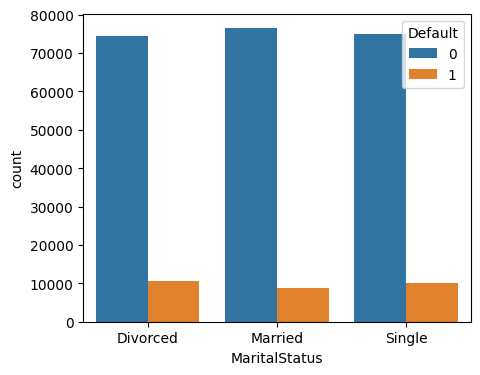

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(data = ld,x = 'MaritalStatus', hue = 'Default')

In [ ]:
marital_status_yes_default = ld[ld['Default']==1].groupby('MaritalStatus').count()['Default']
marital_status_no_default = ld[ld['Default']==0].groupby('MaritalStatus').count()['Default']
percentage_marital_status_default= (marital_status_yes_default/ (marital_status_yes_default+marital_status_no_default))*100
percentage_marital_status_default

MaritalStatus
Divorced    12.532781
Married     10.397177
Single      11.912436
Name: Default, dtype: float64

<Axes: xlabel='MaritalStatus'>

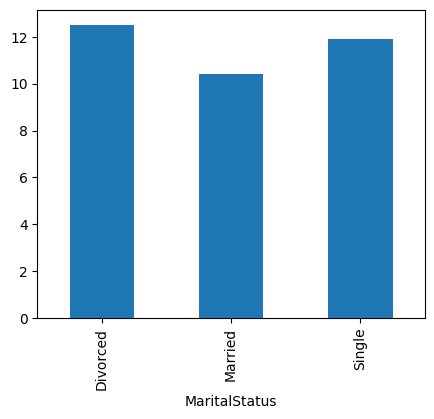

In [ ]:
plt.figure(figsize=(5,4))
percentage_marital_status_default.plot(kind = 'bar')

**Observation:**

**RATIO OF DEFAULT IN LOANPURPOSE**

<Axes: xlabel='LoanPurpose', ylabel='count'>

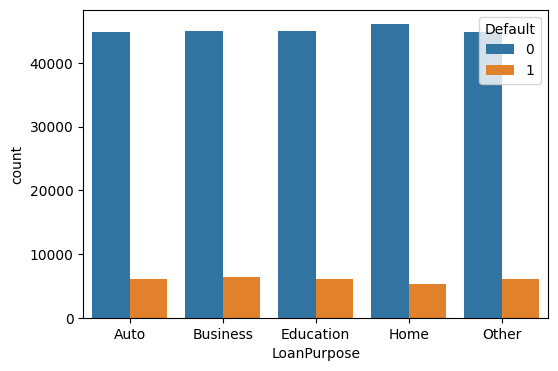

In [ ]:
loan_purpose_order = sorted(ld['LoanPurpose'].unique())
plt.figure(figsize=(6,4))
sns.countplot(data = ld,x = 'LoanPurpose', hue = 'Default',
              order = loan_purpose_order)

In [ ]:
LoanPurpose_yes_default = ld[ld['Default']==1].groupby('LoanPurpose').count()['Default']
LoanPurpose_no_default = ld[ld['Default']==0].groupby('LoanPurpose').count()['Default']
percentage_LoanPurpose_default= (LoanPurpose_yes_default/ (LoanPurpose_yes_default+LoanPurpose_no_default))*100
percentage_LoanPurpose_default

LoanPurpose
Auto         11.881441
Business     12.326017
Education    11.838055
Home         10.234762
Other        11.788506
Name: Default, dtype: float64

<Axes: xlabel='LoanPurpose'>

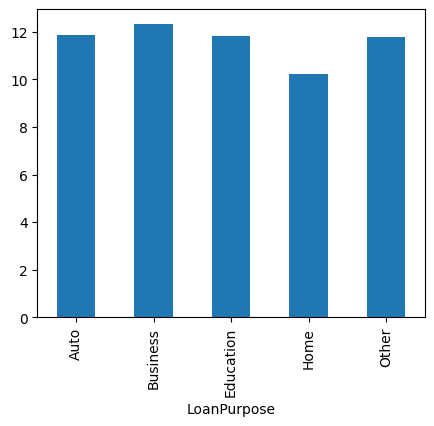

In [ ]:
plt.figure(figsize=(5,4))
percentage_LoanPurpose_default.plot(kind = 'bar')

**Observation:**

**RATIO OF DEFAULT IN EDUCATION**

<Axes: xlabel='Education', ylabel='count'>

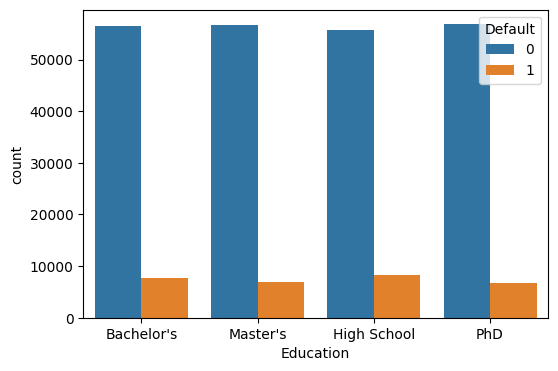

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data = ld,x = 'Education', hue = 'Default')

In [ ]:
Education_yes_default = ld[ld['Default']==1].groupby('Education').count()['Default']
Education_no_default = ld[ld['Default']==0].groupby('Education').count()['Default']
percentage_education_default= (Education_yes_default/ (Education_yes_default+Education_no_default))*100
percentage_education_default

Education
Bachelor's     12.101109
High School    12.878895
Master's       10.871721
PhD            10.585958
Name: Default, dtype: float64

<Axes: xlabel='Education'>

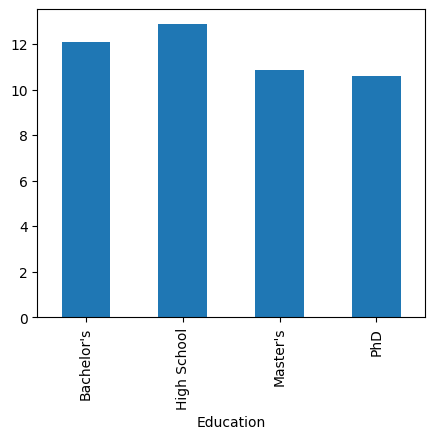

In [ ]:
plt.figure(figsize=(5,4))
percentage_education_default.plot(kind = 'bar')

**RATIO OF DEFAULT IN HASCOSIGNER**

<Axes: xlabel='HasCoSigner', ylabel='count'>

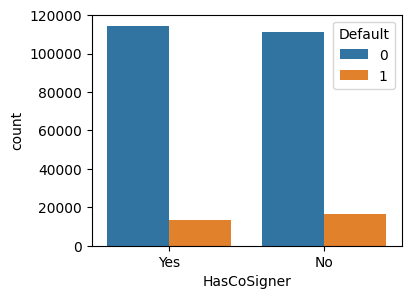

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data = ld,x = 'HasCoSigner', hue = 'Default')

In [ ]:
HasCoSigner_yes_default = ld[ld['Default']==1].groupby('HasCoSigner').count()['Default']
HasCoSigner_no_default = ld[ld['Default']==0].groupby('HasCoSigner').count()['Default']
percentage_HasCoSigner_default= (HasCoSigner_yes_default/ (HasCoSigner_yes_default+HasCoSigner_no_default))*100
percentage_HasCoSigner_default

HasCoSigner
No     12.866051
Yes    10.360138
Name: Default, dtype: float64

<Axes: xlabel='HasCoSigner'>

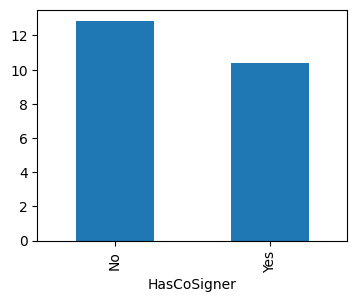

In [ ]:
plt.figure(figsize=(4,3))
percentage_HasCoSigner_default.plot(kind = 'bar')

**RATIO OF DEFAULT IN HASDEPENDENTS**

<Axes: xlabel='HasDependents', ylabel='count'>

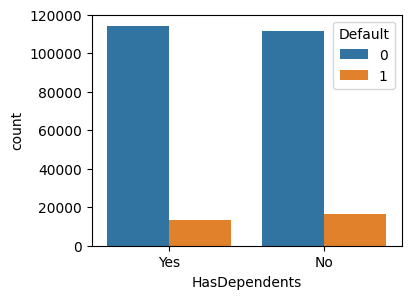

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data = ld,x = 'HasDependents', hue = 'Default')

In [ ]:
HasDependents_yes_default = ld[ld['Default']==1].groupby('HasDependents').count()['Default']
HasDependents_no_default = ld[ld['Default']==0].groupby('HasDependents').count()['Default']
percentage_HasDependents_default= (HasDependents_yes_default/ (HasDependents_yes_default+HasDependents_no_default))*100
percentage_HasDependents_default

HasDependents
No     12.724423
Yes    10.502419
Name: Default, dtype: float64

<Axes: xlabel='HasDependents'>

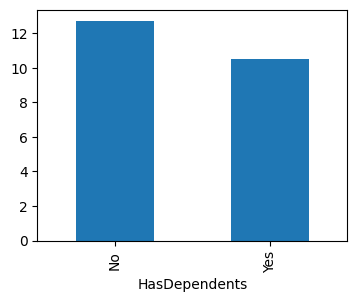

In [ ]:
plt.figure(figsize=(4,3))
percentage_HasDependents_default.plot(kind = 'bar')

## **STEP 2:**
###    **DATA PREPROCESSING**

Encoding the categorical features using the **"pd.get_dummies"**

In [ ]:
ld_encoded = pd.get_dummies(ld[cat_features], drop_first=True, dtype=int)
ld_encoded

,Education_High School,Education_Master's,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
2,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
255343,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
255344,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1
255345,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0


In [ ]:
ld = pd.concat([ld.drop(['Education','EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
                         'LoanPurpose', 'HasCoSigner'],axis = 1),ld_encoded],axis = 1)
ld.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,0,0,0,1,1,0,0,0,1,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,1,0,0,0,0,0,0,1,1
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,1,0,0,1,1,0,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
X = ld.drop('Default', axis=1)
y = ld['Default']

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into train, validation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, shuffle=True)

print(X_val.shape)
print(X_test.shape)
print(X_train.shape)

(38302, 24)
(38303, 24)
(178742, 24)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Feature Scaling (Standardization) my numeric features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[Num_features])
X_train_s = pd.DataFrame(X_train_scaled, columns = Num_features)
X_train_s.reset_index(inplace = True)


# Scaling the numeric features in the validation set
X_val_scaled = scaler.transform(X_val[Num_features])
X_val_s = pd.DataFrame(X_val_scaled, columns=Num_features)


# Scaling the numeric features in the test set
X_test_scaled = scaler.transform(X_test[Num_features])
X_test_s = pd.DataFrame(X_test_scaled, columns = Num_features)
X_test_s.reset_index(inplace = True)


print(X_val_s.shape)
print(X_test_s.shape)
print(X_train_s.shape)

(38302, 9)
(38303, 10)
(178742, 10)


In [ ]:
# Concatenating the scaled numeric features with the remaining features
X_train.reset_index(inplace = True)
X_val.reset_index(inplace = True)
X_test.reset_index(inplace = True)

X_train = pd.concat([X_train_s, X_train.drop(Num_features, axis=1)], axis=1)
X_val = pd.concat([X_val_s, X_val.drop(Num_features, axis=1)], axis=1)
X_test = pd.concat([X_test_s, X_test.drop(Num_features, axis=1)], axis=1)

print(X_val.shape)
print(X_test.shape)
print(X_train.shape)

(38302, 25)
(38303, 26)
(178742, 26)


In [ ]:
X_train

,index,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,0,0.764706,0.649968,0.482708,0.023679,0.008403,0.666667,0.999565,0.25,0.9750,...,0,1,0,1,1,1,0,0,0,0
1,1,0.450980,0.886481,0.059210,0.981785,0.521008,0.000000,0.920435,1.00,0.9625,...,1,0,0,0,1,0,0,0,0,1
2,2,0.078431,0.446914,0.641157,0.921676,0.663866,1.000000,0.131739,0.50,0.4250,...,1,1,0,0,0,0,1,0,0,0
3,3,0.078431,0.040400,0.505108,0.387978,0.176471,0.333333,0.203478,0.50,0.7125,...,1,0,0,1,0,0,0,0,1,1
4,4,0.392157,0.289587,0.667231,0.690346,0.260504,1.000000,0.438261,1.00,0.8250,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178737,178737,0.431373,0.752769,0.639475,0.639344,0.663866,0.333333,0.932174,0.00,0.9625,...,0,0,0,0,0,0,0,1,0,1
178738,178738,0.960784,0.355247,0.753054,0.291439,0.647059,0.666667,0.316957,0.50,0.0125,...,0,0,1,0,0,1,0,0,0,1
178739,178739,0.862745,0.143497,0.223023,0.408015,0.789916,0.666667,0.335652,1.00,0.1750,...,0,0,1,1,0,0,0,0,0,0
178740,178740,0.509804,0.972318,0.789606,0.344262,0.058824,1.000000,0.100435,0.75,0.2500,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
X_train = X_train.drop('index', axis =1)
X_test = X_test.drop('index', axis =1)
X_val = X_val.drop('index', axis =1)

In [ ]:
from imblearn.under_sampling import TomekLinks,NearMiss
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.combine import SMOTETomek


def sampler_function(data_x, data_y, sampler = 0,random_state = 42):
    if sampler == 0:
        sampler = RandomOverSampler(random_state = random_state)
    elif sampler == 1:
        sampler = TomekLinks()
    elif sampler == 2:
        sampler = SMOTE()
    elif sampler == 3:
        sampler = SMOTETomek()
    else:
        sampler = NearMiss()
    X_transformed, y_transformed = sampler.fit_resample(data_x, data_y)

    print('Original dataset shape:', data_y.shape)
    print('Resampled dataset shape:', y_transformed.shape)

    return X_transformed, y_transformed

In [ ]:
X1, y1 = sampler_function(X_train, y_train, sampler = 2)

Original dataset shape: (178742,)
Resampled dataset shape: (316026,)


In [ ]:
col_name = X1.columns

### GAUSSIAN NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing = 1e-09)

In [ ]:
gnb.fit(X1, y1)

GaussianNB()

In [ ]:
gnb_pred = gnb.predict_proba(X_val)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score
# Deriving the ROC_AUC score
auc_score = roc_auc_score(y_val, gnb_pred)

print(f"AUC-ROC Score: {auc_score}")

AUC-ROC Score: 0.7304505337380034


In [ ]:
threshold = 0.5
gnb_pred_c = (gnb_pred >= threshold).astype(int)

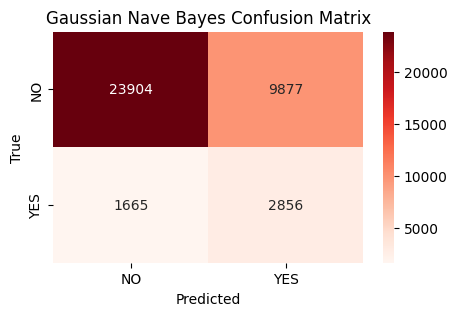

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, gnb_pred_c)

cm = confusion_matrix(y_val, gnb_pred_c)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gaussian Nave Bayes Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, gnb_pred_c))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81     33781
           1       0.22      0.63      0.33      4521

    accuracy                           0.70     38302
   macro avg       0.58      0.67      0.57     38302
weighted avg       0.85      0.70      0.75     38302



### BAGGING CLASSIFIER

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
base_estimator = DecisionTreeClassifier()
# Initialize the Bagging Classifier
bg = BaggingClassifier(estimator=base_estimator, max_features = 0.5, max_samples = 1.0, n_estimators = 100, random_state=42)

In [ ]:
# Train the model
bg.fit(X1, y1)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.5,
                  n_estimators=100, random_state=42)

In [ ]:
bg_pred = bg.predict_proba(X_val)[:, 1]

In [ ]:
auc_score = roc_auc_score(y_val, bg_pred)

print(f"AUC-ROC Score: {auc_score}")

AUC-ROC Score: 0.7043803510493096


In [ ]:
threshold = 0.5
bg_pred_c = (bg_pred >= threshold).astype(int)

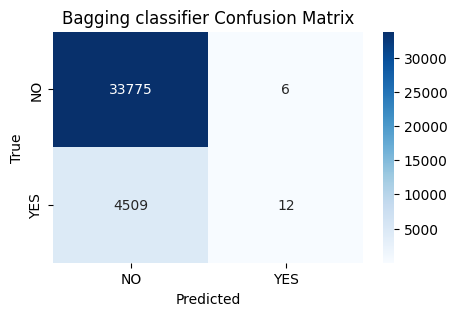

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, bg_pred_c)

cm = confusion_matrix(y_val, bg_pred_c)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Bagging classifier Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, bg_pred_c))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     33781
           1       0.67      0.00      0.01      4521

    accuracy                           0.88     38302
   macro avg       0.77      0.50      0.47     38302
weighted avg       0.86      0.88      0.83     38302



**GRADIENTBOOSTING CLASSIFIER**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X1, y1)

GradientBoostingClassifier()

In [ ]:
gbc_pred = gbc.predict_proba(X_val)[:, 1]

In [ ]:
auc_score = roc_auc_score(y_val, gbc_pred)

print(f"AUC-ROC Score: {auc_score}")

AUC-ROC Score: 0.7249004987110695


In [ ]:
threshold = 0.5
gbc_pred_c = (gbc_pred >= threshold).astype(int)

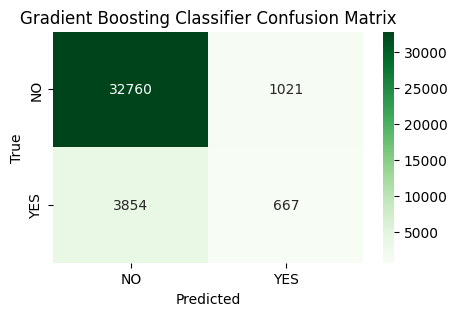

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, gbc_pred_c)

cm = confusion_matrix(y_val, gbc_pred_c)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, gbc_pred_c))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     33781
           1       0.40      0.15      0.21      4521

    accuracy                           0.87     38302
   macro avg       0.64      0.56      0.57     38302
weighted avg       0.84      0.87      0.85     38302



### RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X1, y1)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict_proba(X_val)[:, 1]

In [ ]:
auc_score = roc_auc_score(y_val, rfc_pred)

print(f"AUC-ROC Score: {auc_score}")

AUC-ROC Score: 0.7152238502603465


In [ ]:
threshold = 0.5
rfc_pred_c = (rfc_pred >= threshold).astype(int)

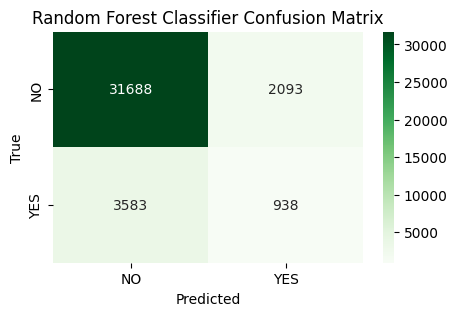

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, rfc_pred_c)

cm = confusion_matrix(y_val, rfc_pred_c)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, rfc_pred_c))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     33781
           1       0.31      0.21      0.25      4521

    accuracy                           0.85     38302
   macro avg       0.60      0.57      0.58     38302
weighted avg       0.83      0.85      0.84     38302



#### KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
 knn.fit(X1, y1)

KNeighborsClassifier()

In [ ]:
knn_pred = knn.predict_proba(X_val)[:, 1]

In [ ]:
auc_score = roc_auc_score(y_val, knn_pred)

print(f"AUC-ROC Score: {auc_score}")

AUC-ROC Score: 0.5884493089264398


In [ ]:
threshold = 0.5
knn_pred_c = (knn_pred >= threshold).astype(int)

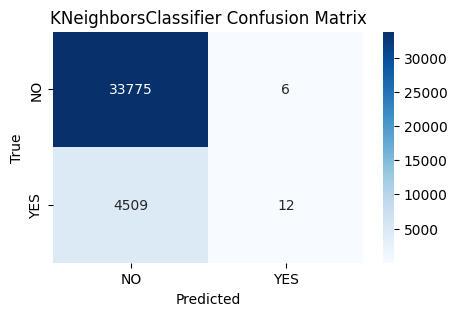

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, bg_pred_c)

cm = confusion_matrix(y_val, bg_pred_c)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNeighborsClassifier Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, knn_pred_c))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76     33781
           1       0.16      0.48      0.24      4521

    accuracy                           0.63     38302
   macro avg       0.53      0.57      0.50     38302
weighted avg       0.82      0.63      0.70     38302



**TENSORFLOW**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tsf = Sequential()
tsf.add(Dense(64, input_dim=X1.shape[1], activation='relu'))
tsf.add(Dropout(0.3))
tsf.add(Dense(32, activation='relu'))
tsf.add(Dropout(0.3))
tsf.add(Dense(16, activation='relu'))
tsf.add(Dropout(0.3))
tsf.add(Dense(1, activation='sigmoid'))

# Compile the model
initial_learning_rate = 0.001
tsf.compile(optimizer=Adam(learning_rate = initial_learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', verbose = 1, patience= 2)
tsf.fit(X1, y1, epochs=10, batch_size=256, validation_data = [X_val, y_val ], callbacks=[early_stopping])

Epoch 1/10
1235/1235 [==============================] - 11s 5ms/step - loss: 0.6024 - accuracy: 0.6765 - val_loss: 0.5839 - val_accuracy: 0.6882
Epoch 2/10
1235/1235 [==============================] - 5s 4ms/step - loss: 0.5689 - accuracy: 0.7121 - val_loss: 0.5702 - val_accuracy: 0.7021
Epoch 3/10
1235/1235 [==============================] - 6s 5ms/step - loss: 0.5607 - accuracy: 0.7197 - val_loss: 0.5654 - val_accuracy: 0.7023
Epoch 4/10
1235/1235 [==============================] - 5s 4ms/step - loss: 0.5551 - accuracy: 0.7238 - val_loss: 0.5631 - val_accuracy: 0.7013
Epoch 5/10
1235/1235 [==============================] - 7s 5ms/step - loss: 0.5520 - accuracy: 0.7263 - val_loss: 0.5676 - val_accuracy: 0.6961
Epoch 6/10
1235/1235 [==============================] - 5s 4ms/step - loss: 0.5499 - accuracy: 0.7282 - val_loss: 0.5937 - val_accuracy: 0.6798
Epoch 6: early stopping


In [ ]:
mtr = pd.DataFrame(tsf.history.history)
mtr

,loss,accuracy,val_loss,val_accuracy
0,0.602360,0.676523,0.583919,0.688163
1,0.568928,0.712055,0.570170,0.702130
2,0.560710,0.719659,0.565407,0.702261
3,0.555139,0.723785,0.563052,0.701295
4,0.551962,0.726295,0.567571,0.696099
5,0.549877,0.728158,0.593742,0.679782


<Axes: >

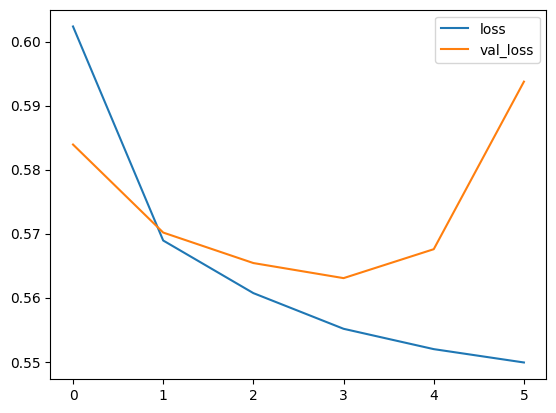

In [ ]:
mtr[['loss', 'val_loss']].plot()

<Axes: >

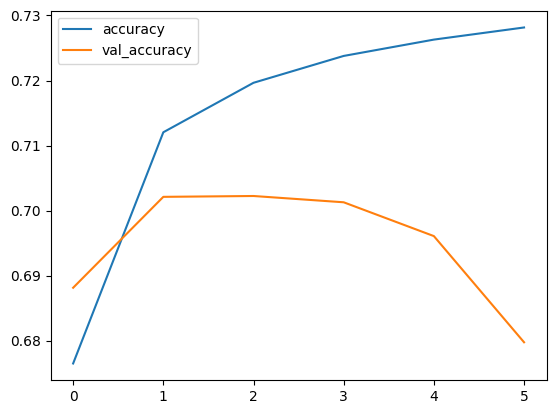

In [ ]:
mtr[['accuracy', 'val_accuracy']].plot()

In [ ]:
#Evaluate the model
loss, accuracy = tsf.evaluate(X_val, y_val)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1197/1197 [==============================] - 3s 2ms/step - loss: 0.5937 - accuracy: 0.6798
Test Accuracy: 67.98%


In [ ]:
# Make predictions and evaluate
tsf_pred = (tsf.predict(X_val) > 0.4).astype("int32")

1197/1197 [==============================] - 2s 2ms/step


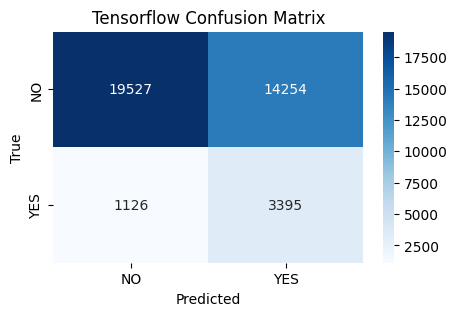

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, tsf_pred)

cm = confusion_matrix(y_val, tsf_pred)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Tensorflow Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, tsf_pred))

              precision    recall  f1-score   support

           0       0.95      0.58      0.72     33781
           1       0.19      0.75      0.31      4521

    accuracy                           0.60     38302
   macro avg       0.57      0.66      0.51     38302
weighted avg       0.86      0.60      0.67     38302



## **XGBOOST CLASSIFIER**

In [ ]:
import xgboost as xgb

In [ ]:
xgbc = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [ ]:
xgbc = xgb.XGBClassifier (colsample_bytree = 0.6, gamma = 0.1, learning_rate = 0.3, n_estimators = 150, reg_alpha = 0, reg_lambda = 1, subsample = 0.8)

In [ ]:
xgbc.fit(X1, y1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgbc_pred = xgbc.predict_proba(X_val)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, xgbc_pred)

print(f"AUC-ROC Score: {auc_score}")

AUC-ROC Score: 0.7352911775086206


In [ ]:
threshold = 0.5
xgbc_pred_c = (xgbc_pred >= threshold).astype(int)

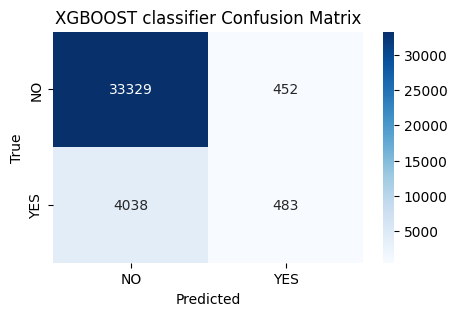

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, xgbc_pred_c)

cm = confusion_matrix(y_val, xgbc_pred_c)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBOOST classifier Confusion Matrix')
plt.show()

## **STACKING CLASSIFIER**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define base models
base_learners = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier())
]


meta_learner = LogisticRegression()

# Creating a Stacking Classifier
stack = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)



In [ ]:
# Fit the model
stack.fit(X1, y1)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
stack_pred = stack.predict_proba(X_val)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, stack_pred)

print(f"AUC-ROC Score: {auc_score}")

AUC-ROC Score: 0.6194696270886899


In [ ]:
threshold = 0.5
stack_pred_c = (stack_pred >= threshold).astype(int)

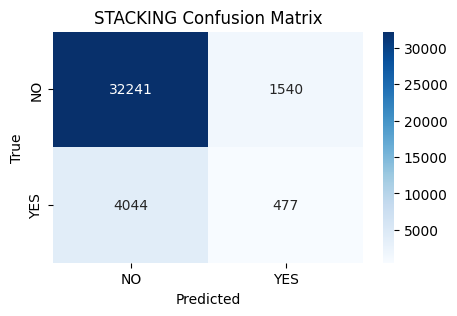

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, stack_pred_c)

cm = confusion_matrix(y_val, stack_pred_c)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('STACKING Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, stack_pred_c))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     33781
           1       0.24      0.11      0.15      4521

    accuracy                           0.85     38302
   macro avg       0.56      0.53      0.53     38302
weighted avg       0.81      0.85      0.83     38302



### LINEAR MODELS
#### LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 0.1, max_iter = 100, penalty = 'l1', solver = 'saga')

In [ ]:
 lr.fit(X1, y1)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [ ]:
lr_pred = lr.predict_proba(X_val)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, lr_pred)

print(f"AUC-ROC Score: {auc_score}")

AUC-ROC Score: 0.7488228381489548


In [ ]:
threshold = 0.5
lr_pred_c = (lr_pred >= threshold).astype(int)

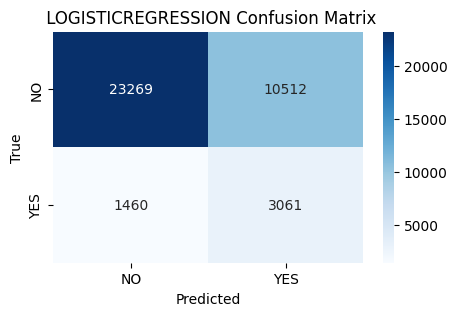

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, lr_pred_c)

cm = confusion_matrix(y_val, lr_pred_c)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(' LOGISTICREGRESSION Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, lr_pred_c))

              precision    recall  f1-score   support

           0       0.94      0.69      0.80     33781
           1       0.23      0.68      0.34      4521

    accuracy                           0.69     38302
   macro avg       0.58      0.68      0.57     38302
weighted avg       0.86      0.69      0.74     38302



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = [lr, stack, xgbc, knn, rfc, gbc, bg, gnb]
results_list = []

for model in models:
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_list.append({
        'Model': model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

results_df = pd.DataFrame(results_list)
results_df

,Model,Accuracy,Precision,Recall,F1
0,"LogisticRegression(C=0.1, penalty='l1', solver...",0.688667,0.221160,0.677493,0.333464
1,"StackingClassifier(estimators=[('lr', Logistic...",0.859254,0.247702,0.110152,0.152492
2,"XGBClassifier(base_score=None, booster=None, c...",0.884578,0.490426,0.104701,0.172562
3,KNeighborsClassifier(),0.640159,0.157664,0.490575,0.238634
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.858653,0.316249,0.197593,0.243221
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.875780,0.392097,0.146491,0.213294
6,(DecisionTreeClassifier(random_state=195292617...,0.885283,0.800000,0.002725,0.005432
7,GaussianNB(),0.699815,0.219277,0.629344,0.325235


### Model Result Observations

Upon evaluating the performance of several models for predicting loan defaults, the following observations were made:

- **Logistic Regression**:
  - Exhibited a moderate accuracy of 68.7%, with precision at 22.1% and recall at 67.9%, resulting in an F1 score of 33.3%. This indicates a good recall rate, meaning it can identify many actual defaulters, but also a higher rate of false positives due to its lower precision.

- **Stacking Classifier**:
  - Achieved high accuracy of 86.1%, but precision and recall were relatively low at 25.4% and 10.9%, respectively, leading to an F1 score of 15.3%. This model may benefit from further tuning or more diverse base models.

- **XGBoost Classifier**:
  - Showed high accuracy of 88.5%, with precision at 50.5% but low recall at 10.7%, resulting in an F1 score of 17.6%. Despite its high accuracy, the low recall suggests it misses many actual defaulters.

- **K-Nearest Neighbors (KNN)**:
  - Had an accuracy of 64.1%, precision of 15.7%, and recall of 48.4%, resulting in an F1 score of 23.7%. KNN struggled more with distinguishing between defaulters and non-defaulters, making it less reliable for this dataset.

- **Random Forest Classifier**:
  - Presented a high accuracy of 85.7%, but its precision was 31.0% and recall was 19.6%, resulting in an F1 score of 24.1%. Despite its high accuracy, the low recall suggested it might be overfitting the training data and not generalizing well to new data.

- **Gradient Boost Classfier**:
  - Had an accuracy of 87.6% and a precision of 39.6%, but its recall was very low at 14.4%, with an F1 score of 21.1%. This model could identify defaulters with high precision but missed many actual defaulters, reducing its practical reliability.

- **Bagging**:
  - Showed high accuracy of 88.5%, but the precision of 80.0% and extremely low recall of 0.2% resulted in an F1 score of 0.4%. This configuration is not practical for identifying defaulters effectively.

- **Gaussian Naive Bayes**:
  - Displayed balanced performance, with an accuracy of 69.9%, precision of 21.9%, and recall of 62.9%, resulting in an F1 score of 32.5%. It performed similarly to Logistic Regression, maintaining a reasonable balance between precision and recall, though it still produced a notable number of false positives.

### Summary

Models like the Decision Tree Classifier and Regressor showed high accuracy but struggled with precision and recall, indicating potential overfitting and poor generalization to new data. Logistic Regression and Gaussian Naive Bayes provided more balanced performance metrics, making them potentially more reliable for predicting loan defaults. The results highlight the importance of considering both precision and recall alongside accuracy, as a model with balanced precision and recall offers a better trade-off between false positives and negatives compared to one that excels only in accuracy.

Among all the models evaluated, **Logistic Regression** is recommended due to its balanced metrics. It offers a good balance between precision and recall, capturing a significant portion of actual defaulters with fewer false positives compared to other models. Logistic Regression is also inherently more interpretable than many complex models like Decision Trees or K-Nearest Neighbors, making it easier to understand the factors influencing loan defaults and make informed decisions. Additionally, Logistic Regression is less likely to overfit the data compared to decision trees, as seen from its moderate accuracy and balanced recall, making it more robust and reliable when applied to new, unseen data. Its computational efficiency and ease of implementation further make Logistic Regression a practical choice for many applications.

In conclusion, while several models were evaluated, Logistic Regression stands out for its balanced performance, interpretability, robustness, and ease of implementation, making it the preferred choice for predicting loan defaults.

In [ ]:
import joblib

In [ ]:
joblib.dump(lr, 'final_lr_model.pkl')

['final_lr_model.pkl']

In [ ]:
joblib.dump(scaler, "lr_scaler.pkl")

['lr_scaler.pkl']

In [ ]:
joblib.dump(col_name, "col_name.pkl")

['col_name.pkl']

# **MODEL DEPLOYMENT ON FLASK API**

## **CREATING A PREDICTING FUNCTION**

In [ ]:
ld.head(1)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,0,0,0,1,1,0,0,0,1,1


In [ ]:
lr_model = joblib.load('final_lr_model.pkl')
lr_scaler = joblib.load("lr_scaler.pkl")
col_name  = joblib.load("col_name.pkl")

In [ ]:
example = {
    "Age" : 56,
    "Income" : 85994,
    "LoanAmount" : 50587,
    "CreditScore" : 520,
    "MonthsEmployed" : 80,
    "NumCreditLines" : 4,
    "InterestRate" : 15.23,
    "LoanTerm" : 36,
    "DTIRatio" : 0.44,
    "Education" : "Bachelor's",
    "EmploymentType" : "Full-time",
    "MaritalStatus" : "Divorced",
    "HasMortgage"	 : "Yes",
    "HasDependents" : "Yes",
    "LoanPurpose"	: "Other",
    "HasCoSigner" : "Yes"
}

In [ ]:
import numpy as np

def return_prediction(model, scaler, col_name, sample_json):
    age = sample_json["Age"]
    income = sample_json["Income"]
    l_amount = sample_json["LoanAmount"]
    cd_score = sample_json["CreditScore"]
    month_emp= sample_json["MonthsEmployed"]
    num_cl = sample_json["NumCreditLines"]
    int_rate = sample_json["InterestRate"]
    loan_term = sample_json["LoanTerm"]
    dti_ratio = sample_json["DTIRatio"]
    edu = sample_json["Education"]
    emp_type = sample_json["EmploymentType"]
    marital_s = sample_json["MaritalStatus"]
    has_mort = sample_json["HasMortgage"]
    has_depd = sample_json["HasDependents"]
    loan_purp = sample_json["LoanPurpose"]
    has_cosg = sample_json["HasCoSigner"]


    cat_df = pd.DataFrame([[edu, emp_type, marital_s, has_mort, has_depd, loan_purp, has_cosg]],
                          columns=['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'])

    cat_encoded = pd.get_dummies(cat_df, drop_first=True)
    num_df = pd.DataFrame([[age, income, l_amount, cd_score, month_emp, num_cl, int_rate, loan_term, dti_ratio]],
                          columns=['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                                   'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'])
    
    combined_df = pd.concat([num_df, cat_encoded], axis=1)
    combined_df = combined_df.reindex(columns = col_name, fill_value=0)

    loan = combined_df.values
    num_scaled = scaler.transform(loan[:, :9])
    loan = np.hstack([num_scaled, loan[:, 9:]])

    prediction = model.predict(loan)

    if prediction == 1:
        return 'Sorry! Loan not approved for you'
    else:
        return 'Loan Approved! Don’t let us regret this'


In [ ]:
return_prediction(lr_model, lr_scaler,col_name, example)

'Loan Approved! Don’t let us regret this'

## **CODE FOR DEPLOYMENT**

In [ ]:
from flask import Flask, render_template, session, url_for, redirect
from wtforms  import StringField, SubmitField
from wtforms.validators import DataRequired
import numpy as np
import pandas as pd
from flask_wtf import FlaskForm
import joblib


def return_prediction(model, scaler, col_name, sample_json):
    age = sample_json["Age"]
    income = sample_json["Income"]
    l_amount = sample_json["LoanAmount"]
    cd_score = sample_json["CreditScore"]
    month_emp= sample_json["MonthsEmployed"]
    num_cl = sample_json["NumCreditLines"]
    int_rate = sample_json["InterestRate"]
    loan_term = sample_json["LoanTerm"]
    dti_ratio = sample_json["DTIRatio"]
    edu = sample_json["Education"]
    emp_type = sample_json["EmploymentType"]
    marital_s = sample_json["MaritalStatus"]
    has_mort = sample_json["HasMortgage"]
    has_depd = sample_json["HasDependents"]
    loan_purp = sample_json["LoanPurpose"]
    has_cosg = sample_json["HasCoSigner"]


    cat_df = pd.DataFrame([[edu, emp_type, marital_s, has_mort, has_depd, loan_purp, has_cosg]],
                          columns=['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'])
    cat_encoded = pd.get_dummies(cat_df, drop_first=True)

    num_df = pd.DataFrame([[age, income, l_amount, cd_score, month_emp, num_cl, int_rate, loan_term, dti_ratio]],
                          columns=['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                                   'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'])
    combined_df = pd.concat([num_df, cat_encoded], axis=1)
    combined_df = combined_df.reindex(columns = col_name, fill_value=0)

    loan = combined_df.values
    num_scaled = scaler.transform(loan[:, :9])
    loan = np.hstack([num_scaled, loan[:, 9:]])

    prediction = model.predict(loan)

    if prediction == 1:
        return 'Declined, kindly retry some other time'
    else:
        return 'Approved! Don’t let us regret this'
#----------------------------------------------------------------------------------------------------------------------------


loan = Flask(__name__)
loan.config["SECRET_KEY"] = 'my secretkey'

class FlowerForm(FlaskForm):
    ag = StringField("AGE", validators=[DataRequired()])
    inc = StringField("INCOME", validators=[DataRequired()])
    l_amt = StringField("LOAN AMOUNT", validators=[DataRequired()])
    c_sco = StringField("CREDIT SCORE", validators=[DataRequired()])
    m_emp = StringField("MONTHS EMPLOYED", validators=[DataRequired()])
    n_cl = StringField("NUMBER OF CREDIT LINES", validators=[DataRequired()])
    i_rate = StringField("INTEREST RATE", validators=[DataRequired()])
    l_term = StringField("LOAN TERM", validators=[DataRequired()])
    dti = StringField("DTI RATIO", validators=[DataRequired()])
    ed = StringField("EDUCATION", validators=[DataRequired()])
    em_typ = StringField("EMPLOYMENT TYPE", validators=[DataRequired()])
    mar_st = StringField("MARITAL STATUS", validators=[DataRequired()])
    mortg = StringField("HAS MORTGAGE?", validators=[DataRequired()])
    deped = StringField("HAS DEPENDENTS?", validators=[DataRequired()])
    l_purp = StringField("LOAN PURPOSE", validators=[DataRequired()])
    cosign = StringField("HAS COSIGNER?", validators=[DataRequired()])

    submit = SubmitField("Apply")


#------------------------------------------------------------------------------------------------------------------------

@loan.route("/", methods = ['GET', 'POST'])
def index():
    
    form = FlowerForm()

    if form.validate_on_submit():
        session['ag'] = form.ag.data
        session['inc'] = form.inc.data
        session['l_amt'] = form.l_amt.data
        session['c_sco'] = form.c_sco.data
        session['m_emp'] = form.m_emp.data
        session['n_cl'] = form.n_cl.data
        session['i_rate'] = form.i_rate.data
        session['l_term'] = form.l_term.data
        session['dti'] = form.dti.data
        session['ed'] = form.ed.data
        session['em_typ'] = form.em_typ.data
        session['mar_st'] = form.mar_st.data
        session['mortg'] = form.mortg.data
        session['deped'] = form.deped.data
        session['l_purp'] = form.l_purp.data
        session['cosign'] = form.cosign.data

        return redirect(url_for('loan_prediction'))
    return render_template('home.html', form = form)
#---------------------------------------------------------------------------------------------------------------------------

lr_model = joblib.load('final_lr_model.pkl')
lr_scaler = joblib.load("lr_scaler.pkl")
col_name  = joblib.load("col_name.pkl")


@loan.route('/loan_prediction')
def loan_prediction():
    content = {}
    content['Age'] = float(session['ag'])
    content['Income'] = float(session['inc'])
    content['LoanAmount'] = float(session['l_amt'])
    content['CreditScore'] = float(session['c_sco'])
    content['MonthsEmployed'] = float(session['m_emp'])
    content['NumCreditLines'] = float(session['n_cl'])
    content['InterestRate'] = float(session['i_rate'])
    content['LoanTerm'] = float(session['l_term'])
    content['DTIRatio'] = float(session['dti'])
    content['Education'] = session['ed']
    content['EmploymentType'] = session['em_typ']
    content['MaritalStatus'] = session['mar_st']
    content['HasMortgage'] = session['mortg']
    content['HasDependents'] = session['deped']
    content['LoanPurpose'] = session['l_purp']
    content['HasCoSigner'] = session['cosign']

    results = return_prediction(lr_model, lr_scaler, col_name, content)
    return render_template('loan_prediction.html', results = results)



if __name__=='__main__':
	loan.run()